In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

/var/folders/7l/k_v47yjs7959fkc75b75m8680000gn/T/ipykernel_38831/2733287486.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("/Users/sanjith/Desktop/DATASETS/employee_turnover.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: >

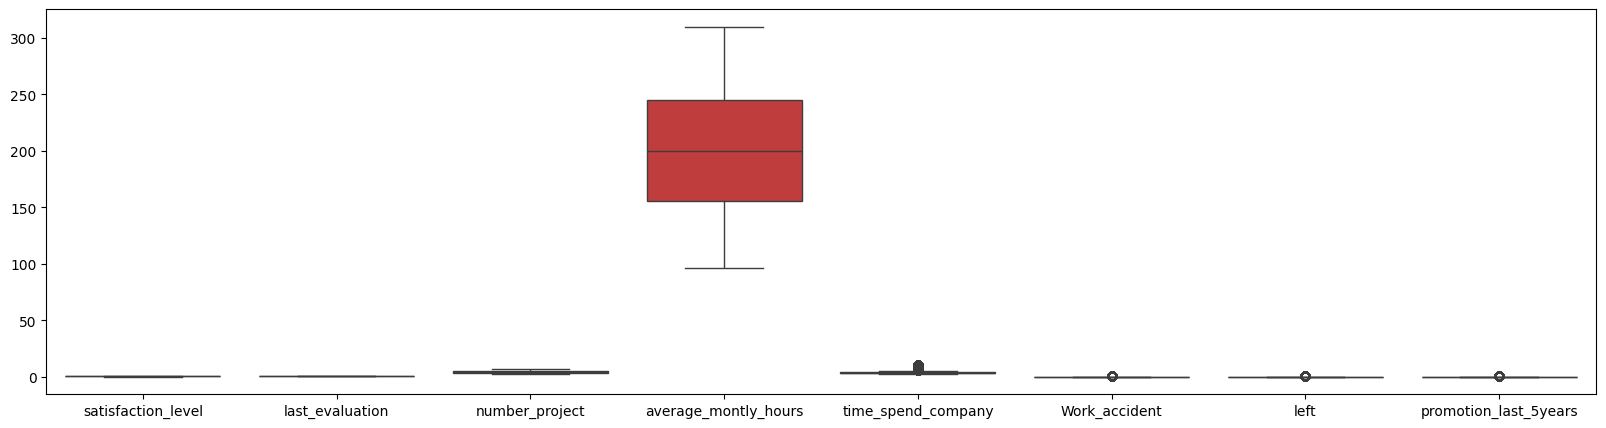

In [60]:
plt.figure(figsize = (20,5))
sns.boxplot(df)



<Axes: xlabel='satisfaction_level', ylabel='left'>

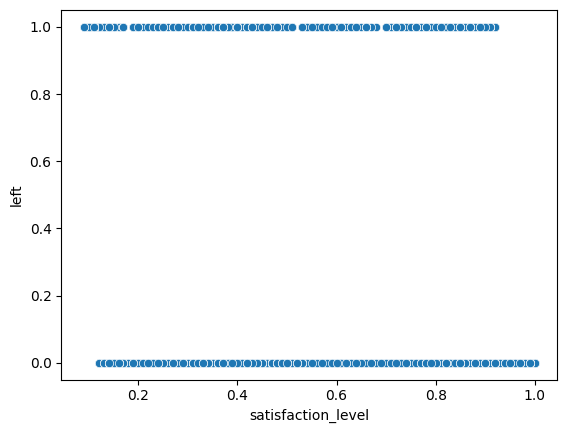

In [32]:
sns.scatterplot(x=df['satisfaction_level'],y=df['left'])

<Axes: xlabel='last_evaluation', ylabel='left'>

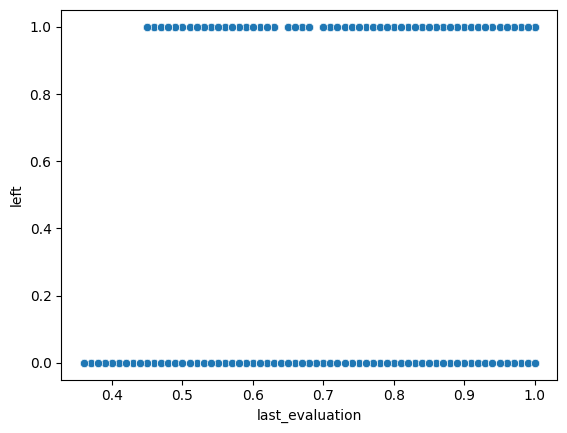

In [31]:
sns.scatterplot(x=df['last_evaluation'],y=df['left'])

In [38]:
promotion_analysis = df.groupby(['promotion_last_5years'])['left'].sum().reset_index()
promotion_analysis

,promotion_last_5years,left
0,0,3552
1,1,19


In [39]:
project_analysis = df.groupby(['number_project'])['left'].sum().reset_index()
project_analysis

,number_project,left
0,2,1567
1,3,72
2,4,409
3,5,612
4,6,655
5,7,256


In [55]:
evaluation_analysis = df.groupby(['last_evaluation'])['left'].sum().reset_index()
evaluation_analysis


,last_evaluation,left
0,0.36,0
1,0.37,0
2,0.38,0
3,0.39,0
4,0.40,0
...,...,...
60,0.96,67
61,0.97,84
62,0.98,64
63,0.99,66


In [71]:
satisfaction_analysis = df.groupby(['satisfaction_level'])['left'].sum().reset_index()
# Temporarily change the setting to display all rows
with pd.option_context('display.max_rows', None):
    print(satisfaction_analysis)


    satisfaction_level  left
0                 0.09   195
1                 0.10   358
2                 0.11   335
3                 0.12     4
4                 0.13     3
5                 0.14    10
6                 0.15     3
7                 0.16     1
8                 0.17     5
9                 0.18     0
10                0.19     6
11                0.20     4
12                0.21     1
13                0.22     1
14                0.23     2
15                0.24     3
16                0.25     3
17                0.26     1
18                0.27     6
19                0.28     3
20                0.29     1
21                0.30     2
22                0.31    17
23                0.32     8
24                0.33     3
25                0.34     4
26                0.35     3
27                0.36    96
28                0.37   194
29                0.38   154
30                0.39   140
31                0.40   169
32                0.41   132
33            

In [56]:
sales_analysis = df.groupby(['sales'])['left'].sum().reset_index()
sales_analysis

,sales,left
0,IT,273
1,RandD,121
2,accounting,204
3,hr,215
4,management,91
5,marketing,203
6,product_mng,198
7,sales,1014
8,support,555
9,technical,697


In [58]:
salary_analysis = df.groupby(['salary'])['left'].sum().reset_index()
salary_analysis

,salary,left
0,high,82
1,low,2172
2,medium,1317


In [65]:
yearsworking_at_analysis = df.groupby(['time_spend_company'])['left'].sum().reset_index()
yearsworking_at_analysis

,time_spend_company,left
0,2,53
1,3,1586
2,4,890
3,5,833
4,6,209
5,7,0
6,8,0
7,10,0


In [64]:
timeworking_analysis = df.groupby(['average_montly_hours'])['left'].sum().reset_index()
timeworking_analysis

,average_montly_hours,left
0,96,0
1,97,0
2,98,0
3,99,0
4,100,0
...,...,...
210,306,18
211,307,14
212,308,20
213,309,16


In [66]:
accidentoccurance_analysis = df.groupby(['Work_accident'])['left'].sum().reset_index()
accidentoccurance_analysis

,Work_accident,left
0,0,3402
1,1,169


In [69]:
df['left'].sum()

3571

In [74]:
corelation = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']].corr()

<Axes: >

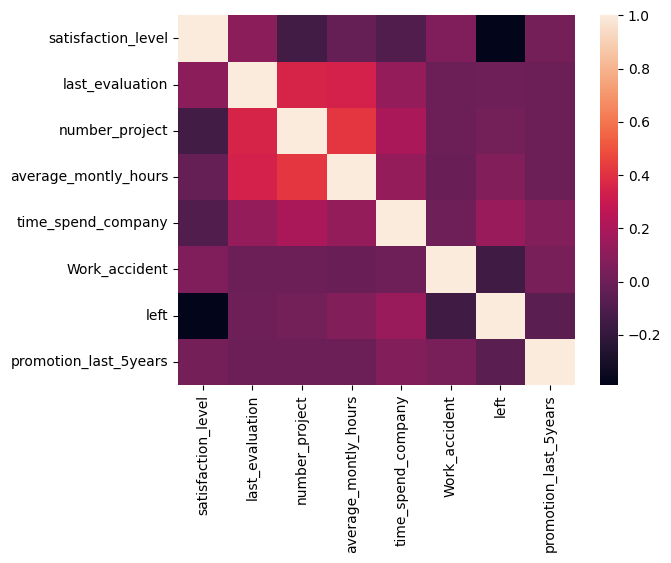

In [75]:
sns.heatmap(corelation)

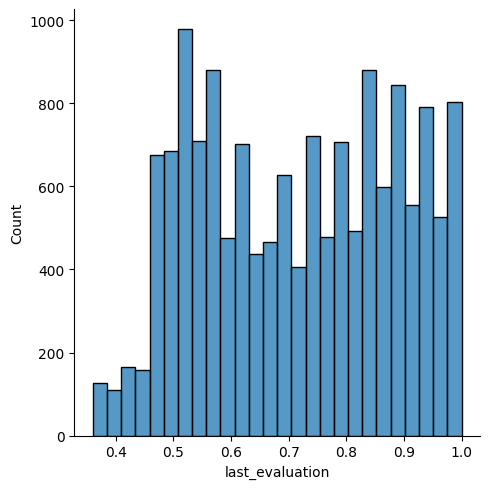

In [77]:
sns.displot(df['last_evaluation'])

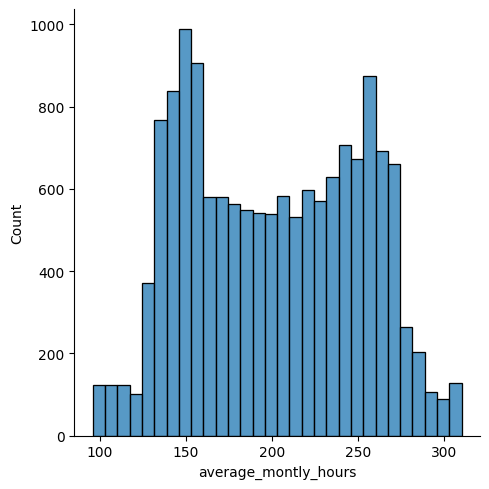

In [78]:
sns.displot(df['average_montly_hours'])

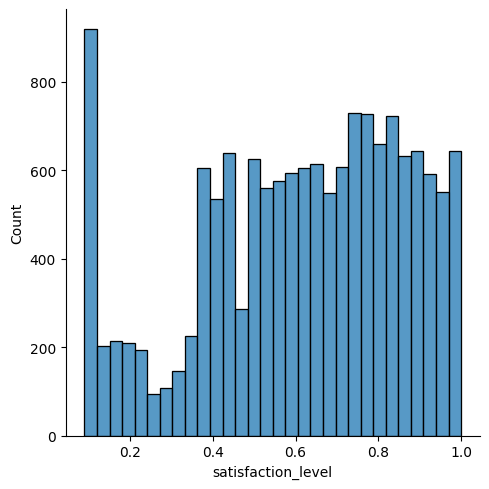

In [80]:
sns.displot(df['satisfaction_level'])

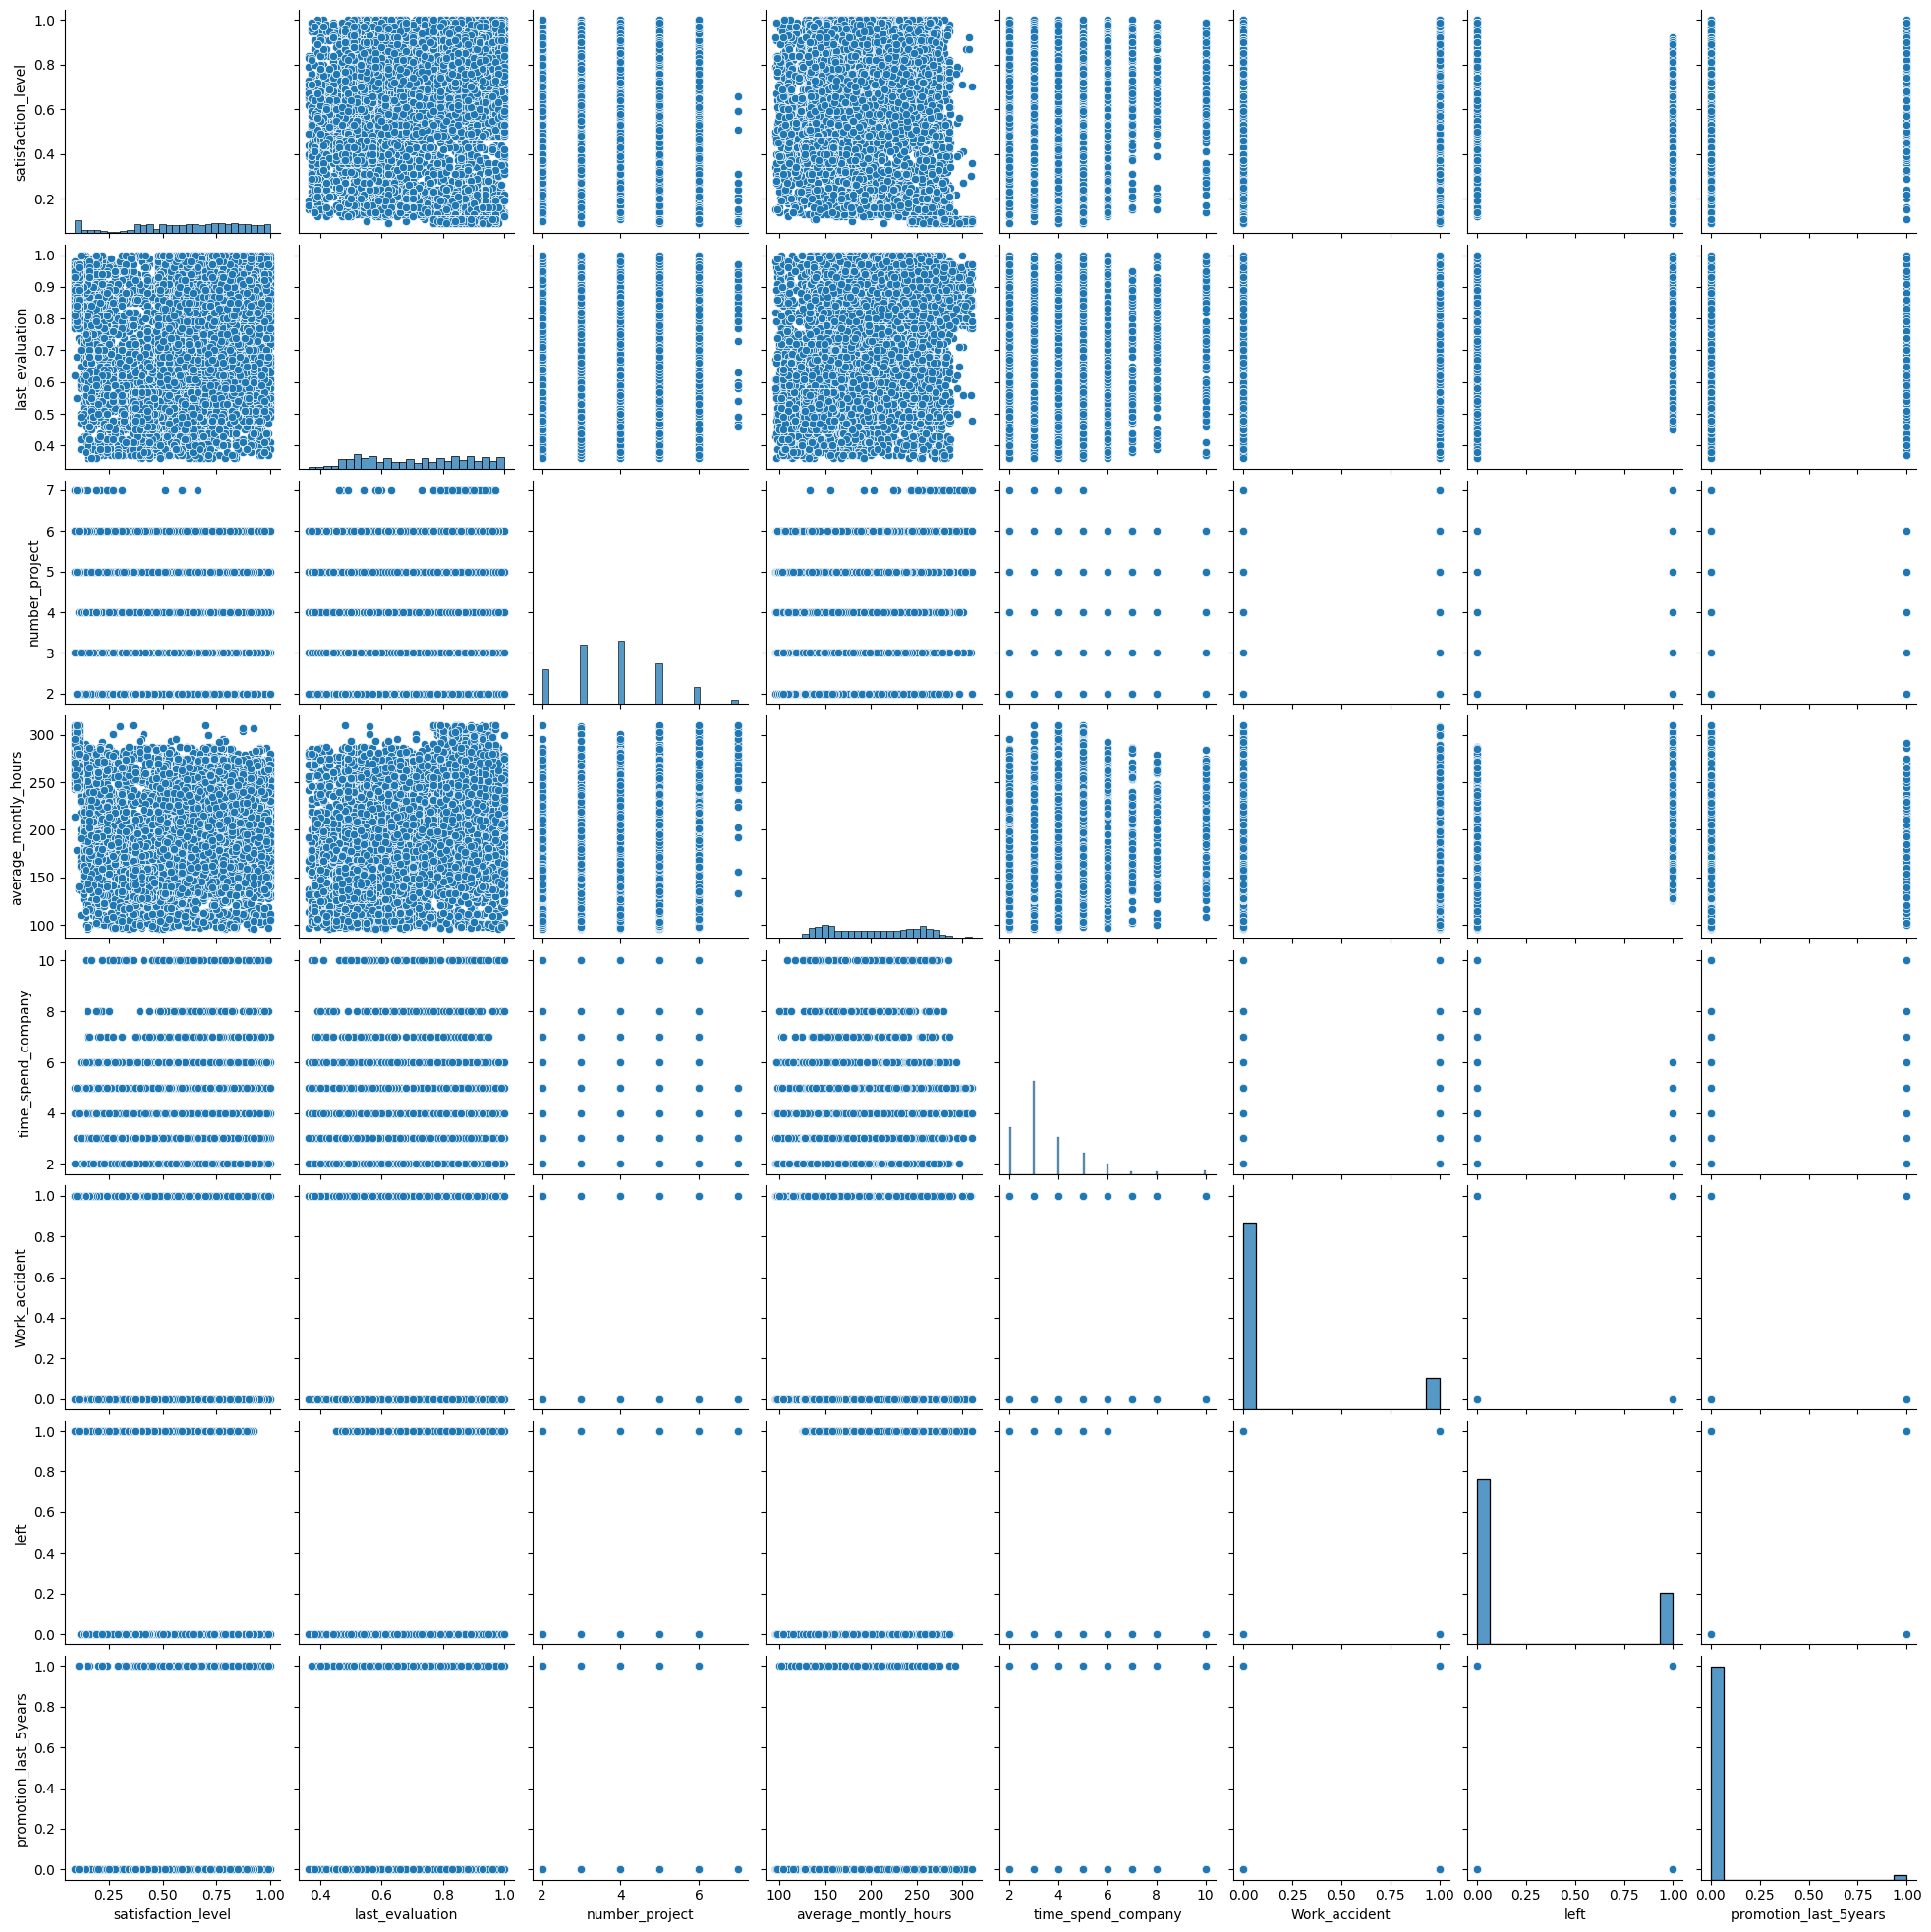

In [82]:
sns.pairplot(df)

<Axes: xlabel='number_project', ylabel='count'>

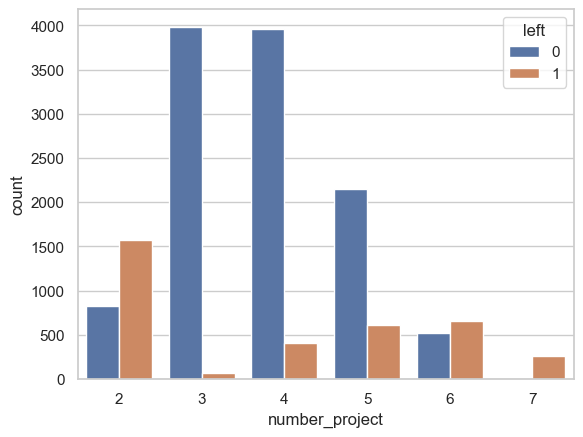

In [220]:
sns.countplot(x = df['number_project'],hue = df['left'])

In [89]:
new_df1 = df.copy()

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
features = ['satisfaction_level','last_evaluation','left']
X = new_df1[features]
X_scaled = scaler.fit_transform(X)

In [96]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [98]:
new_df1['Cluster'] = kmeans.predict(X_scaled)
new_df1['Cluster']

0        1
1        2
2        1
3        2
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: Cluster, Length: 14999, dtype: int32

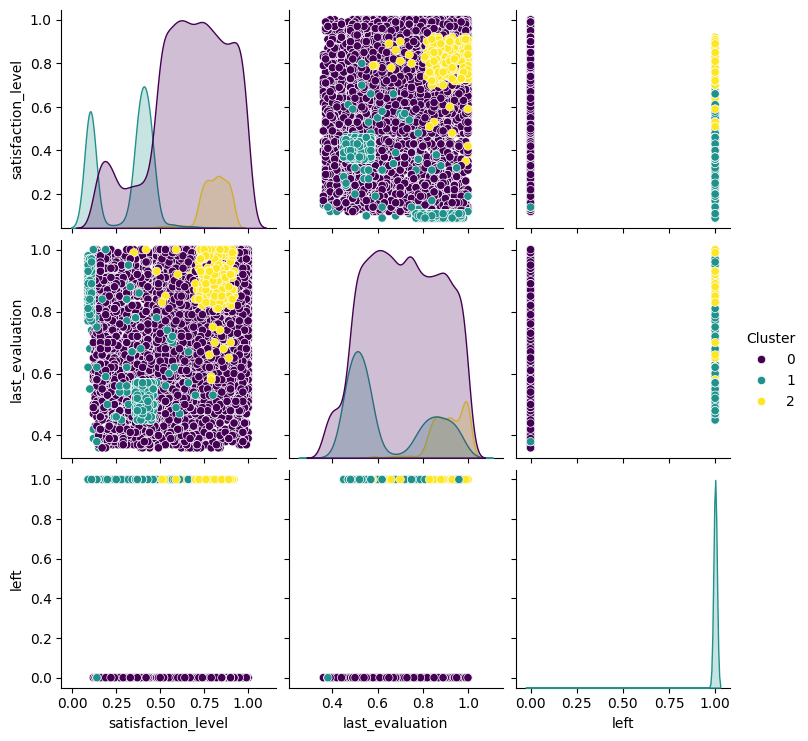

In [101]:
sns.pairplot(new_df1, vars=features, hue='Cluster', palette='viridis')

In [102]:
centers = kmeans.cluster_centers_

centers_original = scaler.inverse_transform(centers)

# Create a DataFrame for cluster centers
centers_df = pd.DataFrame(centers_original, columns=features)
centers_df['cluster'] = range(len(centers_df))

print("Cluster Centers (in original scale):")
print(centers_df)


Cluster Centers (in original scale):
   satisfaction_level  last_evaluation          left  cluster
0            0.667088         0.715648  3.330669e-15        0
1            0.301954         0.643500  9.976923e-01        1
2            0.805865         0.914616  1.000000e+00        2


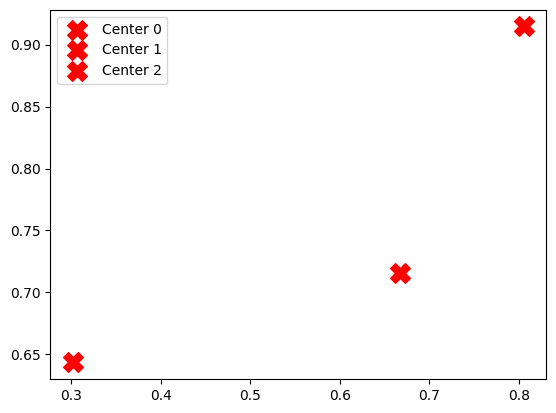

In [103]:
for cluster in range(len(centers_df)):
    plt.scatter(centers_original[cluster, 0], centers_original[cluster, 1], 
                s=200, c='red', label=f'Center {cluster}', marker='X')
plt.legend()
plt.show()

Interpretation:
Cluster 0:

satisfaction_level: 0.667088
last_evaluation: 0.715648
left: 3.330669e-15 (effectively 0)
Inference:

This cluster contains employees with a relatively high satisfaction level and last evaluation score.
The value of left is essentially 0, indicating that employees in this cluster are not likely to have left the company.
Cluster 1:

satisfaction_level: 0.301954
last_evaluation: 0.643500
left: 0.9976923 (effectively 1)
Inference:

This cluster contains employees with a relatively low satisfaction level and a moderate last evaluation score.
The value of left is close to 1, indicating that employees in this cluster are highly likely to have left the company.
Cluster 2:

satisfaction_level: 0.805865
last_evaluation: 0.914616
left: 1.000000 (1)
Inference:

This cluster contains employees with a very high satisfaction level and a very high last evaluation score.
The value of left is 1, indicating that all employees in this cluster have left the company.
Overall Inference:
Cluster 0 represents employees who are satisfied with their job and have good performance evaluations, and these employees have not left the company.
Cluster 1 represents dissatisfied employees with moderate performance evaluations who have mostly left the company.
Cluster 2 represents highly satisfied employees with excellent performance evaluations, but who have nonetheless left the company. This could indicate that high satisfaction and high evaluations alone are not enough to retain employees and that there may be other factors at play (e.g., external job offers, personal reasons, etc.).


In [104]:
new_df2 = df.copy()

In [114]:
X = df.drop(["left"], axis = 1)
y = df['left']

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

categorical_variables = ["salary","sales"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_variables)],remainder = "passthrough")

transformed_data = transformer.fit_transform(X)

In [116]:
transformed_df = pd.DataFrame(transformed_data)

In [117]:
dummies = pd.get_dummies(new_df2[["salary","sales"]])
dummies.astype(int)

,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0,1,0,0,0,0,0,0,0,0,0,1,0


In [122]:
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test = train_test_split(transformed_data,y,test_size=0.2, random_state=123, stratify=y)
smote = SMOTE(random_state=123, sampling_strategy=0.8)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [123]:
print("Original training set shape:", y_train.value_counts())
print("Resampled training set shape:", y_resampled.value_counts())

Original training set shape: left
0    9142
1    2857
Name: count, dtype: int64
Resampled training set shape: left
0    9142
1    7313
Name: count, dtype: int64


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

model1 = LogisticRegression()
model1.fit(X_resampled,y_resampled)
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(model1, X_resampled, y_resampled, cv=kf, scoring='accuracy')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      9142
           1       0.74      0.75      0.74      7313

    accuracy                           0.77     16455
   macro avg       0.77      0.77      0.77     16455
weighted avg       0.77      0.77      0.77     16455



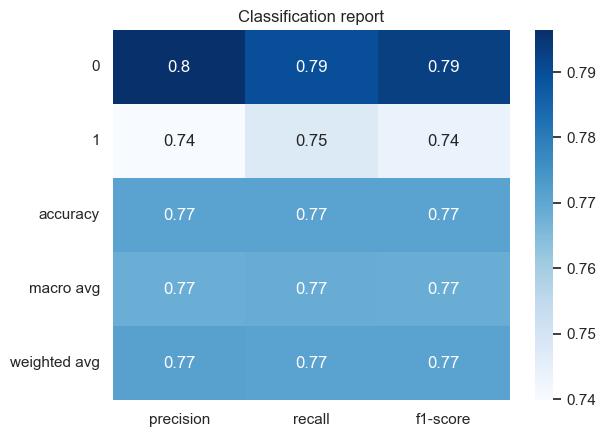

In [135]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_predict
# Perform cross-validation and collect predictions
y_pred = cross_val_predict(model1, X_resampled, y_resampled, cv=kf)

# Compute classification report
report = classification_report(y_resampled, y_pred, output_dict=True)
print(classification_report(y_resampled, y_pred))

# Plot the classification report
def plot_classification_report(report, title='Classification report', cmap='Blues'):
    sns.set(style='whitegrid')
    heatmap = sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap=cmap)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    plt.title(title)
    plt.show()

plot_classification_report(report)

In [137]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_resampled,y_resampled)

kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores1 = cross_val_score(model2, X_resampled, y_resampled, cv=kf, scoring='accuracy')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9142
           1       1.00      0.98      0.99      7313

    accuracy                           0.99     16455
   macro avg       0.99      0.99      0.99     16455
weighted avg       0.99      0.99      0.99     16455



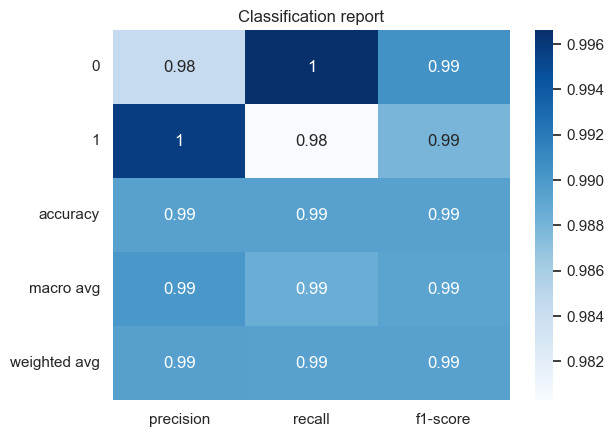

In [138]:
# Perform cross-validation and collect predictions
y_pred1 = cross_val_predict(model2, X_resampled, y_resampled, cv=kf)

# Compute classification report
report = classification_report(y_resampled, y_pred1, output_dict=True)
print(classification_report(y_resampled, y_pred1))

# Plot the classification report
def plot_classification_report(report, title='Classification report', cmap='Blues'):
    sns.set(style='whitegrid')
    heatmap = sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap=cmap)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    plt.title(title)
    plt.show()

plot_classification_report(report)

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier()
model3.fit(X_resampled,y_resampled)
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores2 = cross_val_score(model3, X_resampled, y_resampled, cv=kf, scoring='accuracy')


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9142
           1       0.98      0.96      0.97      7313

    accuracy                           0.97     16455
   macro avg       0.97      0.97      0.97     16455
weighted avg       0.97      0.97      0.97     16455



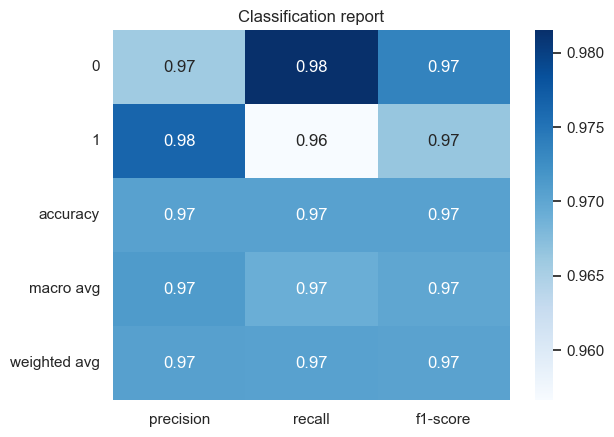

In [140]:
# Perform cross-validation and collect predictions
y_pred2 = cross_val_predict(model3, X_resampled, y_resampled, cv=kf)

# Compute classification report
report = classification_report(y_resampled, y_pred2, output_dict=True)
print(classification_report(y_resampled, y_pred2))

# Plot the classification report
def plot_classification_report(report, title='Classification report', cmap='Blues'):
    sns.set(style='whitegrid')
    heatmap = sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap=cmap)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    plt.title(title)
    plt.show()

plot_classification_report(report)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

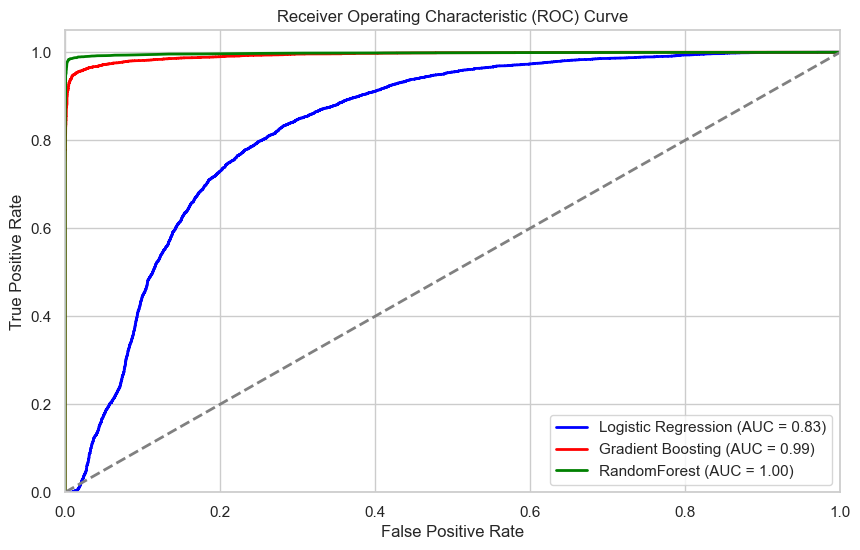

In [142]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report
# Perform cross-validation and collect predictions
y_pred_logistic = cross_val_predict(model1, X_resampled, y_resampled, cv=kf, method='predict_proba')[:, 1]
y_pred_gbc = cross_val_predict(model3, X_resampled, y_resampled, cv=kf, method='predict_proba')[:, 1]
y_pred_rf = cross_val_predict(model2, X_resampled, y_resampled, cv=kf, method='predict_proba')[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_resampled, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)


# Compute ROC curve and AUC for Gradient Boosting Classifier
fpr_gbc, tpr_gbc, _ = roc_curve(y_resampled, y_pred_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

#Compute for RFClassifier

fpr_rf,tpr_rf,_ = roc_curve(y_resampled,y_pred_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbc:.2f})')
plt.plot(fpr_rf,tpr_rf,color='green',lw=2, label=f'RandomForest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [145]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_resampled,y_pred)
cm2 = confusion_matrix(y_resampled,y_pred1)
cm3 = confusion_matrix(y_resampled,y_pred2)

print("cm1: ",cm1)
print("cm2: ",cm2)
print("cm3: ",cm3)

cm1:  [[7220 1922]
 [1846 5467]]
cm2:  [[9111   31]
 [ 144 7169]]
cm3:  [[8973  169]
 [ 317 6996]]


WE NEED RECALL

In [208]:
#Best model - random forest classifier

probability = model2.predict_proba(X_test)[:, 1]
probability

employee_turnover_df = pd.DataFrame(probability)
employee_turnover_df['probability'] = probability
employee_turnover_df

,0,probability
0,0.00,0.00
1,0.37,0.37
2,0.04,0.04
3,0.02,0.02
4,0.01,0.01
...,...,...
2995,0.01,0.01
2996,0.03,0.03
2997,0.03,0.03
2998,0.04,0.04


In [216]:
from sklearn.metrics import accuracy_score,precision_score,f1_score

y_pred_rfclass = model2.predict(X_test)
accuracy_score(y_test,y_pred_rfclass)

0.991

In [217]:
precision_score(y_test,y_pred_rfclass)

0.9831223628691983

In [219]:
f1_score(y_test,y_pred_rfclass)

0.9810526315789474

In [212]:
employee_turnover_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   0            3000 non-null   float64
 1   probability  3000 non-null   float64
 2   Risk Zone    3000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 70.4+ KB


In [211]:
conditions = [
    (employee_turnover_df['probability'] < 0.20),
    (employee_turnover_df['probability'] >= 0.20) & (employee_turnover_df['probability'] < 0.60),
    (employee_turnover_df['probability'] >= 0.60) & (employee_turnover_df['probability'] < 0.90),
    (employee_turnover_df['probability'] >= 0.90)
]

values = ['Safe Zone (Green)', 'Low Risk Zone (Yellow)', 'Medium Risk Zone (Orange)', 'High Risk Zone (Red)']

employee_turnover_df['Risk Zone'] = np.select(conditions, values)
employee_turnover_df

,0,probability,Risk Zone
0,0.00,0.00,Safe Zone (Green)
1,0.37,0.37,Low Risk Zone (Yellow)
2,0.04,0.04,Safe Zone (Green)
3,0.02,0.02,Safe Zone (Green)
4,0.01,0.01,Safe Zone (Green)
...,...,...,...
2995,0.01,0.01,Safe Zone (Green)
2996,0.03,0.03,Safe Zone (Green)
2997,0.03,0.03,Safe Zone (Green)
2998,0.04,0.04,Safe Zone (Green)
